<a href="https://colab.research.google.com/github/blablamukul/colab_notebooks/blob/main/flowers_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import cv2
import tensorflow_hub as hub

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15172358234_28706749a5.jpg'),
 PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4242976586_607a8f9843_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg')]

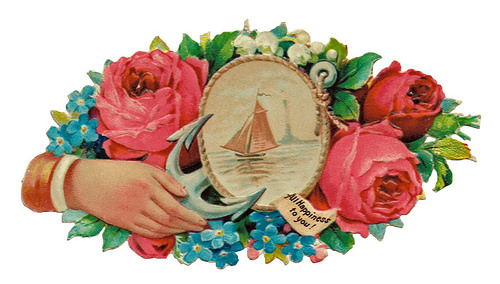

In [7]:
PIL.Image.open(str(roses[0]))

In [8]:
flower_data_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [9]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [10]:
img_array = cv2.imread(str(flower_data_dict['roses'][0]))
img_array.shape

(284, 500, 3)

In [11]:
X,y = [], []

In [12]:
for flower_name, images in flower_data_dict.items():
  for image in images:
    img_array = cv2.imread(str(image))
    img_array_resized = cv2.resize(img_array,(224,224))
    X.append(img_array_resized)
    y.append(flower_labels_dict[flower_name])

In [13]:
len(X)

3670

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0)

In [16]:
X_test_scaled = X_test/255
X_train_scaled = X_train/255

In [17]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)

In [18]:
model = keras.Sequential([
        data_augmentation,
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu'),
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.1),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.1),
        #keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        #keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        #keras.layers.MaxPooling2D(),
        #keras.layers.Dropout(0.1),
        keras.layers.Flatten(),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(500, activation = 'relu'),
        keras.layers.Dense(5, activation = 'softmax')])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs =40)

Epoch 1/40
86/86 [==============================] - 39s 80ms/step - loss: 1.8296 - accuracy: 0.3641
Epoch 2/40
86/86 [==============================] - 7s 80ms/step - loss: 1.1763 - accuracy: 0.4996
Epoch 3/40
86/86 [==============================] - 7s 81ms/step - loss: 1.0684 - accuracy: 0.5774
Epoch 4/40
86/86 [==============================] - 7s 82ms/step - loss: 0.9698 - accuracy: 0.6170
Epoch 5/40
86/86 [==============================] - 7s 83ms/step - loss: 0.9332 - accuracy: 0.6421
Epoch 6/40
86/86 [==============================] - 7s 83ms/step - loss: 0.8856 - accuracy: 0.6679
Epoch 7/40
86/86 [==============================] - 7s 83ms/step - loss: 0.8214 - accuracy: 0.6824
Epoch 8/40
86/86 [==============================] - 7s 82ms/step - loss: 0.7985 - accuracy: 0.6882
Epoch 9/40
86/86 [==============================] - 7s 81ms/step - loss: 0.7486 - accuracy: 0.7082
Epoch 10/40
86/86 [==============================] - 7s 80ms/step - loss: 0.7375 - accuracy: 0.7137
Epoch 11

In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 30ms/step - loss: 1.1791 - accuracy: 0.6895


[1.1791027784347534, 0.6895424723625183]

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)     

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Saved_Models/flowerrecognition.h5')